In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
!ls -lat ..

total 588
-rw------- 1 ldhagen ldhagen  10213 Jul  7 16:37  nohup.out
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul  7 16:37  SBC_PPP_Work
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul  7 16:37  .
-rwxrwxrwx 1 ldhagen ldhagen  53587 Jul  7 16:36 'Texas Hospital Capacity over Time by TSA Region.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen  30566 Jul  7 16:36 'Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen 127443 Jul  7 16:36 'Cumulative Tests over Time by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen  82895 Jul  7 16:36 'Texas COVID-19 Active Case Data by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen 113363 Jul  7 16:36 'Texas COVID-19 Fatality Count Data by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen 138184 Jul  7 16:36 'Texas COVID-19 Case Count Data by County.xlsx'
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul  7 16:36  Texas_Covid_Data_Notebook
-rwxrwxrwx 1 ldhagen ldhagen  15764 Jul  6 19:22  CoVID-19_Dashboard_Data.csv
drwxrwxrwx 1 ldhagen ldhagen   4096 Jul  6 15:26  Prison

In [3]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Case Count Data by County.xlsx",header=2)

In [4]:
a = df_Texas_Covid_case.set_index('County Name')

In [5]:
b = a.T.Total[a.columns[1:]]

In [6]:
b

Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-04         0
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-05         0
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-06         5
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-09        12
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-10        15
                                                                                                           ...  
Cases 07-03                                                                                               183532
Cases 07-04                                                                                               191790
Cases 07-05                                                                                     

In [7]:
b.index[101][-5:]

'06-16'

In [8]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


In [9]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Total Cases'])

In [10]:
c = dated_df.set_index('Date')

In [11]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,12.0
2020-03-10,15.0
...,...
2020-07-03,183532.0
2020-07-04,191790.0
2020-07-05,195239.0


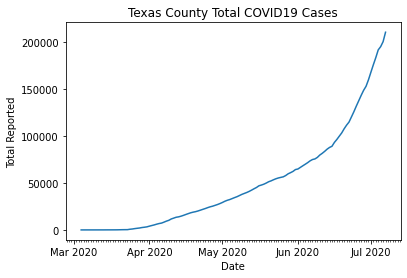

In [12]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c)
plt.title('Texas County Total COVID19 Cases')
plt.savefig('TexasTotal.png')

In [13]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,12.0
2020-03-10,15.0
...,...
2020-07-03,183532.0
2020-07-04,191790.0
2020-07-05,195239.0


In [14]:
x = c.diff(periods = 1)

In [15]:
x_7day_moving= x.rolling(7).mean().shift()

In [16]:
x.rename(columns={'Total Cases':'New Cases'}, inplace=True)

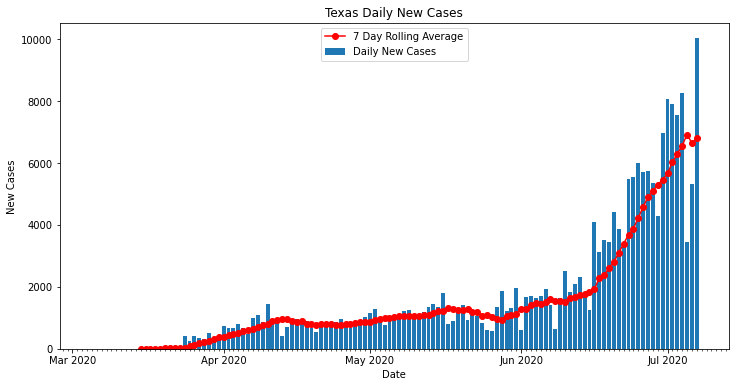

In [17]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Texas Daily New Cases')
plt.bar(x.index,x['New Cases'])
plt.plot(x_7day_moving,'ro-')
plt.legend(['7 Day Rolling Average','Daily New Cases'])
fig.savefig('TexasNewCasesDaily.png')

In [18]:
x

,New Cases
Date,
2020-03-04,NaN
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,7.0
2020-03-10,3.0
...,...
2020-07-03,7555.0
2020-07-04,8258.0
2020-07-05,3449.0


In [19]:
x[x['New Cases'] > 7554]

,New Cases
Date,
2020-07-01,8076.0
2020-07-02,7915.0
2020-07-03,7555.0
2020-07-04,8258.0
2020-07-07,10028.0
